### Import necessary libraries.


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image, display

### Read the image.


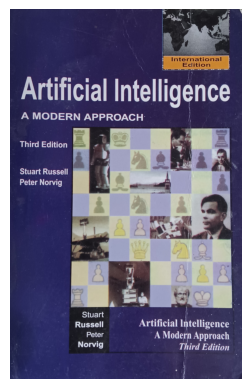

In [5]:
# Provide the path to the image file
image_path = "image.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

Convert the image to grayscale image.

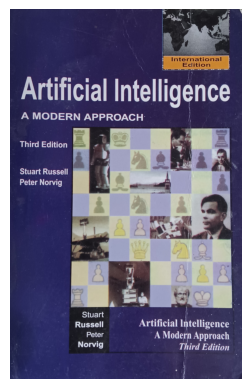

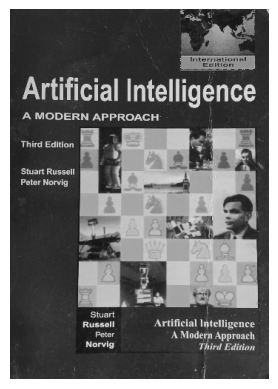

In [6]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image
resized_image = cv2.resize(gray_image, (350, 500))
resized_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

# Display the grayscale image using matplotlib
plt.imshow(resized_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

Convert grayscale image to a *nxm* matrix **A**.

In [7]:
# Convert the NumPy array to matrix A
A = np.array(gray_image)

# Print the shape of the matrix (height x width)
print("Shape of A:", A.shape)

# Print the matrix A
print("Matrix A:\n", A)

Shape of A: (2706, 1694)
Matrix A:
 [[ 42  42  43 ... 132 132 138]
 [ 44  40  40 ... 133 129 135]
 [ 44  39  41 ... 133 133 134]
 ...
 [ 49  51  51 ...  40  41  41]
 [ 49  47  49 ...  41  42  41]
 [ 47  47  49 ...  42  44  45]]


Singular value decomposition.

In [8]:
# Perform Singular Value Decomposition
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# U, S, and Vt are the factorized matrices
# U and Vt are orthogonal matrices, and S is a 1D array of singular values

# Print the shapes of U, S, and Vt
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of Vt:", Vt.shape)

# Print the matrices U, S, and Vt
print("Matrix U:\n", U)
print("Matrix S:\n", np.diag(S))  # Display S as a diagonal matrix
print("Matrix Vt:\n", Vt)

Shape of U: (2706, 1694)
Shape of S: (1694,)
Shape of Vt: (1694, 1694)
Matrix U:
 [[-0.00944742  0.00322694 -0.00866455 ...  0.01878268  0.00702002
   0.00544544]
 [-0.00910613  0.0029014  -0.00945159 ...  0.01408496 -0.02707342
   0.01401365]
 [-0.00907812  0.0033923  -0.00959066 ... -0.03027889  0.03680343
  -0.01335824]
 ...
 [-0.0098289   0.00544392 -0.01217958 ...  0.00647029 -0.02108366
  -0.0075599 ]
 [-0.00982529  0.00536862 -0.01220998 ...  0.00754976  0.0162257
  -0.0307581 ]
 [-0.0098352   0.00512642 -0.01235975 ...  0.01443717 -0.01867646
   0.01617302]]
Matrix S:
 [[2.15107377e+05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.92212230e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.55192922e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.20235609e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+0

k-rank Approximation

In [9]:
limit_k = min (A.shape)
print("Maximum size of k: ", limit_k)

Maximum size of k:  1694


In [15]:
def low_rank_approximation(A, k):
    """
    Compute the k-rank approximation of matrix A using Singular Value Decomposition (SVD).

    Parameters:
    - A: Input matrix
    - k: Target rank for approximation

    Returns:
    - A_k: k-rank approximation of matrix A
    """

    # Truncate singular values and matrices to rank k
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]

    # Compute the k-rank approximation
    A_k = np.dot(U_k, np.dot(S_k, Vt_k))

    return A_k

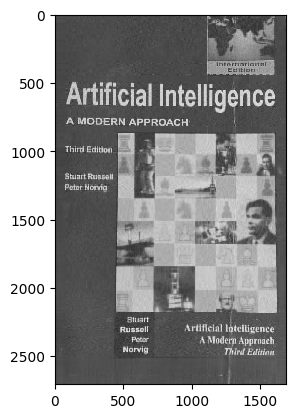

Original Matrix A:
 [[ 42  42  43 ... 132 132 138]
 [ 44  40  40 ... 133 129 135]
 [ 44  39  41 ... 133 133 134]
 ...
 [ 49  51  51 ...  40  41  41]
 [ 49  47  49 ...  41  42  41]
 [ 47  47  49 ...  42  44  45]]

70-Rank Approximation of A:
 [[ 46.19930138  46.43833416  47.48157633 ... 111.65039675 112.60850569
  113.51124466]
 [ 47.17168119  47.58068493  48.86378373 ... 119.28000055 120.2936382
  121.2458722 ]
 [ 46.95579159  47.30756267  48.66042113 ... 123.2144669  124.04355667
  124.80567586]
 ...
 [ 43.53500059  43.91853257  44.27214203 ...  58.26017879  58.31820585
   58.26254273]
 [ 43.55416464  43.92905666  44.25968919 ...  58.9333439   58.9461947
   58.9531795 ]
 [ 43.24195015  43.61771725  43.94048811 ...  59.27429684  59.27493057
   59.33606424]]


In [16]:
# By trial and error finding the lowest value of k such that the author's name can be read out clearly
# k's value is approximately 70. Can be lower if the person's eye-sight is super clear.
k = 70

approximation = low_rank_approximation(A, k)
# plot the matrix as grayscale image
plt.imshow(approximation, cmap='gray', interpolation='nearest')
plt.show()

print("Original Matrix A:\n", A)
print(f"\n{k}-Rank Approximation of A:\n", approximation)

In [18]:
image_array = []

for i in range(1,4):
  k = i*10;
  approximation = low_rank_approximation(A, k)
  image_array.append(approximation)

for i in range(1,4):
  k = i*50;
  approximation = low_rank_approximation(A, k)
  image_array.append(approximation)

for i in range(1,5):
  k = 100 + i*200;
  approximation = low_rank_approximation(A, k)
  image_array.append(approximation)

print(image_array.__len__())




10


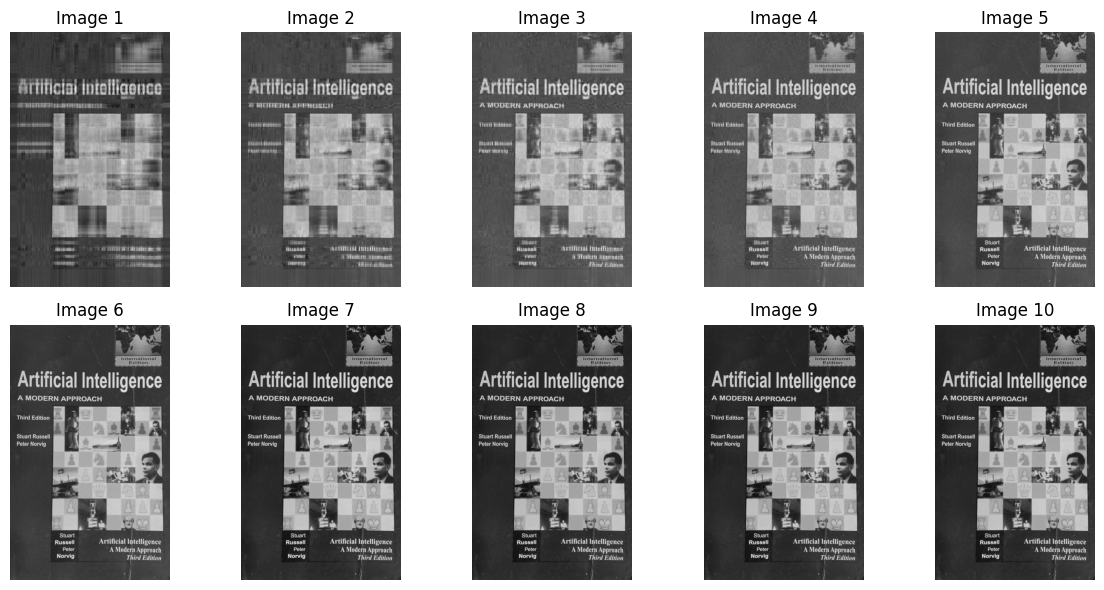

In [19]:
# Set the number of rows and columns in the grid
rows = 2
cols = 5

# Create a subplot grid
fig, axs = plt.subplots(rows, cols, figsize=(12, 6))

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Plot each image
for i in range(len(image_array)):
    axs[i].imshow(image_array[i], cmap='gray')
    axs[i].axis('off')  # Turn off axis labels for clarity
    axs[i].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()
